In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joannelim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joannelim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/joannelim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/joannelim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/joannelim/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_csv('trip_advisor.csv')

ta_df = df.copy()

# Data cleaning

In [5]:
ta_df['Rating'] = ta_df['Rating'].astype(int)
ta_df['Date of Stay'] = pd.to_datetime(ta_df['Date of Stay'], format='%Y-%m-%d')

ta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11232 entries, 0 to 11231
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Review Title         11232 non-null  object        
 1   Review Text          11232 non-null  object        
 2   Date of Stay         11232 non-null  datetime64[ns]
 3   Author Contribution  11232 non-null  object        
 4   Rating               11232 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 438.9+ KB


In [6]:
ta_df.head()

,Review Title,Review Text,Date of Stay,Author Contribution,Rating
0,Must see in Singapore,A must not miss place for tourists to visit wh...,2024-03-01,73,5
1,Marina Bay world class,Amazing hotel and loved the facilities. Being ...,2024-03-01,1,5
2,Nice touch.,While the initial check in experience was not ...,2024-03-01,2,5
3,Amazing experience at MBS with superb hospital...,I booked the Sands Premiere Suite to celebrate...,2024-03-01,1,5
4,Incredibile,"Nina is amazing as all the team, I loved her h...",2024-03-01,2,5


In [7]:
def clean_text(text):
    cleaned_text = ''.join([char.lower() for char in text if char.isalpha() or char.isspace()])
    return cleaned_text

In [9]:
def process_text(text):
    
    # Initialise
    lemmatizer = WordNetLemmatizer()
    processed_text = " "
    
    # Process input
    text_lower = text.lower()
    word = word_tokenize(text_lower)
    
    # Alphabetical Tokens
    alphabetic_tokens = [word for word in word if re.match('^[a-zA-Z]+$', word)]
    
    # Remove stopwords from text and lemmatize
    stop_words = set(stopwords.words('english'))

    
    
    lem_words = []
    for word in alphabetic_tokens:
        if word not in stop_words:
            lem_words.append(lemmatizer.lemmatize(word))
    
    # Join the list of words
    processed_text = processed_text.join(lem_words)     #print(edited_stop_words)

    return processed_text

In [10]:
# ta_df['review_clean'] = ta_df['Review Text'].apply(clean_text)
# ta_df['title_clean'] = ta_df['Review Title'].apply(clean_text)

# review_string = ' '.join(list(ta_df.review_clean.values))
# title_string =  ' '.join(list(ta_df.title_clean.values))

# ta_df['Review Text'].apply(process_text)

ta_df['review_clean'] = ta_df['Review Text'].apply(process_text)
ta_df['title_clean'] = ta_df['Review Title'].apply(process_text)



In [28]:
review_string = " ".join(ta_df['review_clean'])
title_string = " ".join(ta_df['title_clean'])

# Exploratory Data Analysis


In [59]:
ta_df.isnull().sum()

Review Title           0
Review Text            0
Date of Stay           0
Author Contribution    0
Rating                 0
review_clean           0
title_clean            0
Year of Stay           0
dtype: int64

In [60]:
ta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11232 entries, 0 to 11231
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Review Title         11232 non-null  object        
 1   Review Text          11232 non-null  object        
 2   Date of Stay         11232 non-null  datetime64[ns]
 3   Author Contribution  11232 non-null  object        
 4   Rating               11232 non-null  int64         
 5   review_clean         11232 non-null  object        
 6   title_clean          11232 non-null  object        
 7   Year of Stay         11232 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(5)
memory usage: 658.3+ KB


In [42]:
summary_numerical = ta_df.describe()

# Count of non-null values for categorical features
summary_categorical = ta_df.describe(include=['object'])

print("Summary Statistics for Numerical Features:")
print(summary_numerical)
print("\nSummary Statistics for Categorical Features:")
print(summary_categorical)

Summary Statistics for Numerical Features:
              Date of Stay        Rating  Year of Stay
count                11232  11232.000000  11232.000000
mean   2017-11-28 10:31:40      4.359330   2017.445513
min    2014-01-01 00:00:00      1.000000   2014.000000
25%    2016-01-01 00:00:00      4.000000   2016.000000
50%    2017-08-01 00:00:00      5.000000   2017.000000
75%    2019-02-01 00:00:00      5.000000   2019.000000
max    2024-03-01 00:00:00      5.000000   2024.000000
std                    NaN      1.006158      2.392570

Summary Statistics for Categorical Features:
       Review Title                                        Review Text  \
count         11232                                              11232   
unique         9172                                              11100   
top         Amazing  One of the best hotels in the World that I hav...   
freq            115                                                  3   

       Author Contribution                   

<Figure size 1000x600 with 0 Axes>

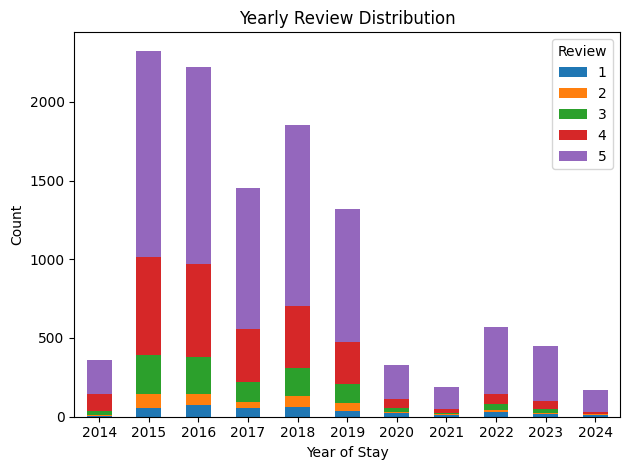

In [35]:
ta_df['Year of Stay'] = ta_df["Date of Stay"].dt.year

yearly_rating_counts = ta_df.groupby(['Year of Stay', 'Rating']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))

# Plotting the bar chart for yearly review distribution
yearly_rating_counts.plot(kind='bar', stacked=True)
plt.title('Yearly Review Distribution')
plt.xlabel('Year of Stay')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Review')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


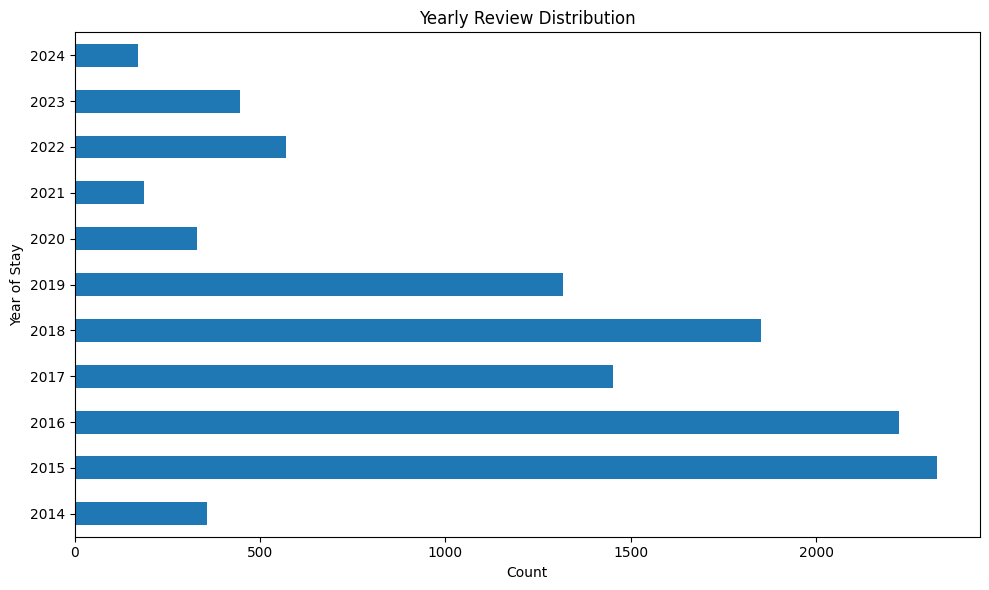

In [71]:
ta_df['Year of Stay'] = ta_df["Date of Stay"].dt.year

# Group by 'Year of Stay' and sum the counts across all ratings
yearly_total_counts = ta_df.groupby('Year of Stay').size()

plt.figure(figsize=(10, 6))

# Plotting the bar chart for yearly review distribution
yearly_total_counts.plot(kind='barh')
plt.title('Yearly Review Distribution')
plt.ylabel('Year of Stay')
plt.xlabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


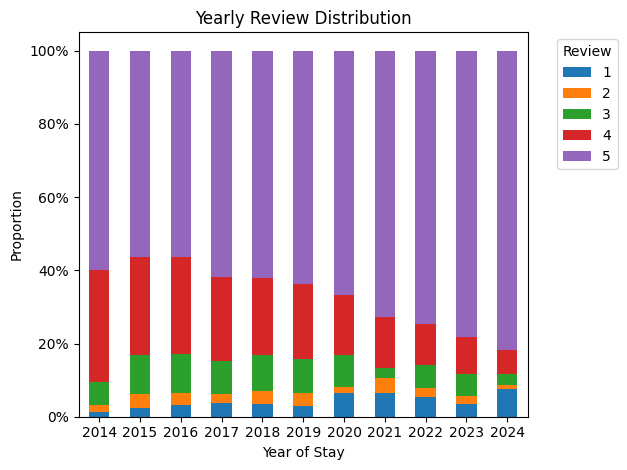

In [68]:
import matplotlib.ticker as mtick

yearly_total_ratings = yearly_rating_counts.sum(axis=1)

# Calculate the proportion of each rating for each year
yearly_rating_proportion = yearly_rating_counts.div(yearly_total_ratings, axis=0)

# Plotting the bar chart for yearly review distribution with proportion
ax = yearly_rating_proportion.plot(kind='bar', stacked=True)
plt.title('Yearly Review Distribution')
plt.xlabel('Year of Stay')
plt.ylabel('Proportion')

# Convert y-axis labels to percentage format
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Review', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


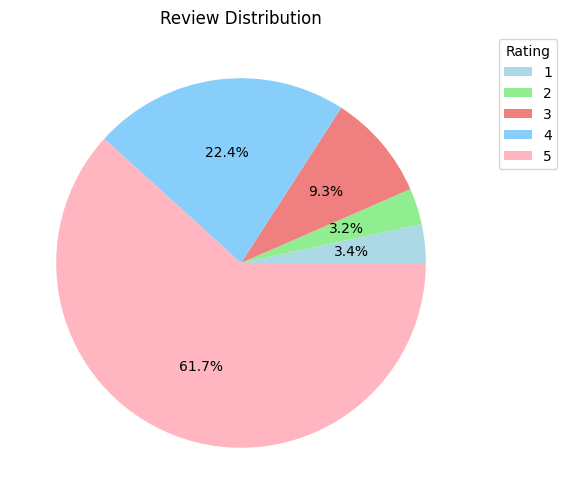

In [41]:
# Count the occurrences of each unique value in the "Rating" column and sort by index
rating_counts = ta_df['Rating'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(rating_counts, labels=None, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'])
plt.title('Review Distribution')

# Adding legend
plt.legend(title='Rating', labels=rating_counts.index, loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()

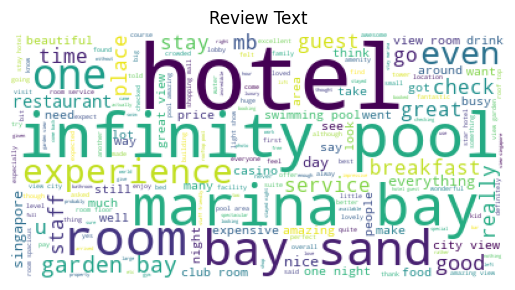

In [72]:
wordcloud_review = WordCloud(background_color="white")

# Generate a word cloud
wordcloud_review.generate(review_string)

plt.imshow(wordcloud_review)
plt.axis('off')
plt.title("Review Text")

plt.show()

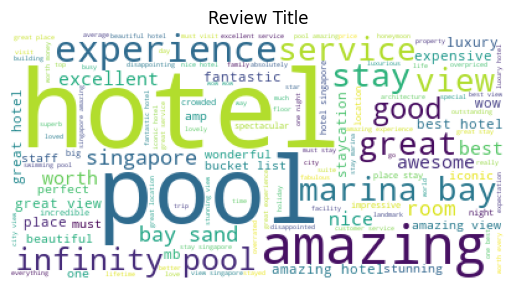

In [73]:
wordcloud_title = WordCloud(background_color="white")

wordcloud_title.generate(title_string)

plt.imshow(wordcloud_title)
plt.axis('off')
plt.title("Review Title")

plt.show()

# Sentiment Analysis


1. Rule Based Sentiment Analysis

In [44]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

review = "With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent."
scores = analyzer.polarity_scores(review)
ta_df['BagOfScores_Review'] = ta_df['review_clean'].apply(lambda x: analyzer.polarity_scores(x))
ta_df['BagOfScores_Title'] = ta_df['title_clean'].apply(lambda x: analyzer.polarity_scores(x))
ta_df['VADERCompoundScore_Review'] = ta_df['BagOfScores_Review'].apply(lambda x: x['compound'])
ta_df['VADERCompoundScore_Title'] = ta_df['BagOfScores_Title'].apply(lambda x: x['compound'])


In [45]:
ta_df_neg = ta_df[ta_df['Rating'] == 1]
ta_df_neg

,Review Title,Review Text,Date of Stay,Author Contribution,Rating,review_clean,title_clean,BagOfScores_Review,BagOfScores_Title,VADERCompoundScore_Review,VADERCompoundScore_Title
26,One night only if you must!,We will certainly never stay here again. First...,2024-03-01,4,1,certainly never stay first impression stick mb...,one night must,"{'neg': 0.136, 'neu': 0.78, 'pos': 0.085, 'com...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",-0.6278,0.0000
28,Terrible Experience at Hefty Cost,Post on behalf of husband butnI was one of the...,2024-03-01,3,1,post behalf husband butni one occupant subject...,terrible experience hefty cost,"{'neg': 0.208, 'neu': 0.642, 'pos': 0.15, 'com...","{'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'comp...",-0.9794,-0.4767
59,"The staffs and city view are great, but no wor...",You paid $1300 au for a night room looks like ...,2024-02-01,1,1,paid au night room look like back make booking...,staff city view great worth money,"{'neg': 0.027, 'neu': 0.651, 'pos': 0.322, 'co...","{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...",0.9246,0.7184
67,"The staffs and city view are great, but no wor...",You paid $1300 au for a night room looks like ...,2024-02-01,1,1,paid au night room look like back make booking...,staff city view great worth money,"{'neg': 0.027, 'neu': 0.651, 'pos': 0.322, 'co...","{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...",0.9246,0.7184
87,No one will care about your requests at this h...,1st night so far and extremely disappointed.Ch...,2024-02-01,12,1,night far extremely midnight paid full rate up...,one care request hotel,"{'neg': 0.114, 'neu': 0.758, 'pos': 0.128, 'co...","{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'comp...",0.4767,0.4939
...,...,...,...,...,...,...,...,...,...,...,...
10882,Prison Stay,Paid almost $600 for one night and given 2 key...,2014-12-01,9,1,paid almost one night given key card everywher...,prison stay,"{'neg': 0.232, 'neu': 0.671, 'pos': 0.097, 'co...","{'neg': 0.767, 'neu': 0.233, 'pos': 0.0, 'comp...",-0.7914,-0.5106
10898,poor customer service,I made a reservation for a room for New Years ...,2014-12-01,40,1,made reservation room new year eve period canc...,poor customer service,"{'neg': 0.12, 'neu': 0.515, 'pos': 0.365, 'com...","{'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'comp...",0.9559,-0.4767
11006,Events team could be Improve,I expected top-notch services from luxury hote...,2014-10-01,1,1,expected service luxury hotel singapore howeve...,event team could improve,"{'neg': 0.346, 'neu': 0.558, 'pos': 0.096, 'co...","{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...",-0.9042,0.4404
11055,snobbish approach for poor service,The hotel has a very poor service. We stayed t...,2014-09-01,2,1,hotel poor service stayed sometime ago paid to...,snobbish approach poor service,"{'neg': 0.115, 'neu': 0.746, 'pos': 0.139, 'co...","{'neg': 0.714, 'neu': 0.286, 'pos': 0.0, 'comp...",0.3400,-0.6124


In [53]:
import sys
!{sys.executable} -m pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 43.5 MB/s eta 0:00:0000:010:01


2. Textblob, returns the polarity of the text. Polarity determines the sentiment of the text, values lie in [-1,1].

In [1]:
from textblob import TextBlob
ta_df['TextBlob_Title'] = ta_df['title_clean'].apply(lambda x: TextBlob(x).sentiment.polarity)
ta_df['TextBlob_Review'] = ta_df['review_clean'].apply(lambda x: TextBlob(x).sentiment.polarity)

KeyboardInterrupt: 

3. Transformer: follow an Encoder-Decoder-based architecture and employ the concepts of self-attention to yield impressive results. Though one can always build a transformer model from scratch, it is quite tedious a task. 

Did not implement this on the data because it takes quite a while to load. But it works, although may need to truncate words that are too long.

In [8]:
import transformers
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
data = ["It was the best of times.", "t was the worst of times."]

sentiment_pipeline(data)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


[{'label': 'POSITIVE', 'score': 0.999457061290741},
 {'label': 'NEGATIVE', 'score': 0.9987301230430603}]

In [58]:
# preprocessing to truncate words
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
def preprocess_text(text, max_length=512):
    # Tokenize the text
    tokens = tokenizer.tokenize(text)

    # Truncate if necessary

    if len(tokens) > max_length:
        tokens = tokens[:max_length]

    # Pad if necessary
    if len(tokens) < max_length:
        tokens += ['[PAD]'] * (max_length - len(tokens))

    # Convert tokens back to text
    processed_text = " ".join(tokens)

    return processed_text

# Example usage
text = "Your input text here"
processed_text = preprocess_text(text)

In [57]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

data = ["It was the best of times.", "t was the worst of times."]
sentiment_pipeline(data)

# ta_df['Transformer_Review'] = ta_df['review_clean'].apply(lambda x: sentiment_pipeline(x))
# ta_df['Transformer_Title'] = ta_df['title_clean'].apply(lambda x: sentiment_pipeline(x))


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.999457061290741},
 {'label': 'NEGATIVE', 'score': 0.9987301230430603}]